In [1]:
import numpy as np

ぐりーでぃ

In [ ]:
def getChoice(V):
    if V[0]-V[1]>0:
        choice="A"
    elif V[0]-V[1]<0:
        choice="B"
    else: #価値が等しいときはランダム
        if np.random.rand()>0.5:
            choice="A"
        else:
            choice="B"
    return choice #choiceを返す

εグリーディの場合のgetChoice()

In [10]:
def getChoice(V,e):
    if V[0]-V[1]>0:
        if np.random.rand()<e:
            choice="B"
        else:
            choice="A"
    elif V[0]-V[1]<0:
        if np.random.rand()<e:
            choice="A"
        else:
            choice="B"
    else: #価値が等しいときはランダム
        if np.random.rand()>0.5:
            choice="A"
        else:
            choice="B"
    return choice #choiceを返す

softmaxの場合のgetChoice()

In [2]:
def getChoice(V,beta):
    P=softmax(V,beta)
    if np.random.rand()<P[0]:
        choice="A"
    else:
        choice="B"
    return choice #choiceを返す

In [3]:
def softmax(V,beta): #引数はnumpy配列Vとbeta
    V=V/np.max(V) #最大値で割っておく。やらなくてもいいけど。
    P=np.exp(beta*V)/np.sum(np.exp(beta*V))#softmaxの式そのまま
    return P #それぞれの選択肢の選択確率の入った配列


強化学習エージェント

In [4]:
def RLagent(V,R,hist,alpha):
    Vnxt=np.zeros(2)
    if hist==1: #前回Aが選ばれた場合はAの価値を更新
        Vnxt[0]=V[0]+alpha*(R-V[0])
        Vnxt[1]=V[1]
    else: 
        Vnxt[1]=V[1]+alpha*(R-V[1])
        Vnxt[0]=V[0]
    return Vnxt #新しい価値を返す

メインのてつづき

In [11]:
t=20
hist=np.zeros(20,dtype=int)
goukei=0

#必要な変数を追加
V=np.zeros((21,2))
V[0,:]=30,30 #予測の初期値、0のままでもいい
alpha=0.3


if np.random.rand()>0.5:
    a,b=45,60
else:
    a,b=60,45
    
for i in range(t):
    choice=getChoice(V[i,:],0.1)

    if choice=="A":
        hist[i]=1
        r=np.random.normal(a,20)
    elif choice=="B":
        hist[i]=2
        r=np.random.normal(b,20)
    else:
        break#A, B 以外のキーを押したら終了
        
    if r<0:
        r=0
    r=int(r)
    goukei+=r
    print(f"{r}点当たりました")
    print(f"合計は{goukei}点です")
    print()
    V[i+1,:]=RLagent(V[i,:],r,hist[i],alpha)# 次のトライアルに行く前に学習
    
print()
print("+++++++++++++++++")
print("Aの期待値: "+str(a)+", Bの期待値: "+str(b))
print("Aの選択数: "+str(np.sum(hist[hist==1]))+", Bの選択回数: "+str(30-np.sum(hist[hist==1])))
print("合計点: "+str(goukei))
print("+++++++++++++++++")

15点当たりました
合計は15点です

66点当たりました
合計は81点です

55点当たりました
合計は136点です

56点当たりました
合計は192点です

78点当たりました
合計は270点です

31点当たりました
合計は301点です

54点当たりました
合計は355点です

71点当たりました
合計は426点です

86点当たりました
合計は512点です

40点当たりました
合計は552点です

75点当たりました
合計は627点です

47点当たりました
合計は674点です

45点当たりました
合計は719点です

56点当たりました
合計は775点です

60点当たりました
合計は835点です

60点当たりました
合計は895点です

85点当たりました
合計は980点です

83点当たりました
合計は1063点です

82点当たりました
合計は1145点です

47点当たりました
合計は1192点です


+++++++++++++++++
Aの期待値: 45, Bの期待値: 60
Aの選択数: 6, Bの選択回数: 24
合計点: 1192
+++++++++++++++++


In [15]:
hist

array([1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1])

In [11]:
V

array([[30.        , 30.        ],
       [30.        , 44.1       ],
       [30.        , 55.17      ],
       [41.1       , 55.17      ],
       [41.1       , 42.819     ],
       [40.47      , 42.819     ],
       [41.829     , 42.819     ],
       [41.829     , 57.5733    ],
       [40.3803    , 57.5733    ],
       [40.3803    , 67.90131   ],
       [40.3803    , 62.230917  ],
       [44.76621   , 62.230917  ],
       [44.76621   , 61.8616419 ],
       [42.736347  , 61.8616419 ],
       [42.736347  , 66.40314933],
       [47.6154429 , 66.40314933],
       [39.63081003, 66.40314933],
       [39.63081003, 67.18220453],
       [32.84156702, 67.18220453],
       [37.68909691, 67.18220453],
       [28.48236784, 67.18220453]])

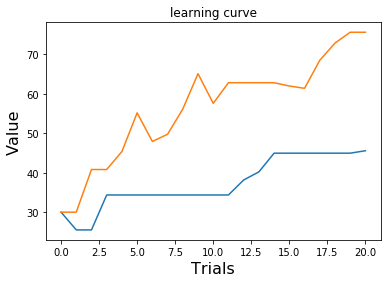

In [13]:
import matplotlib.pyplot as plt #インポート

plt.plot(V)
plt.ylabel("Value",fontsize=16)
plt.xlabel("Trials",fontsize=16)
plt.title("learning curve")
plt.show()

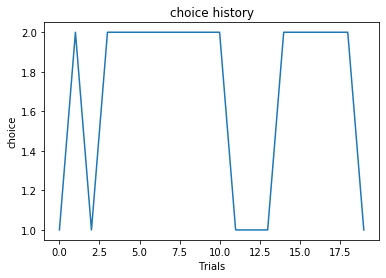

In [14]:
plt.plot(hist)
plt.ylabel("choice")
plt.xlabel("Trials")
plt.title("choice history")
plt.show()

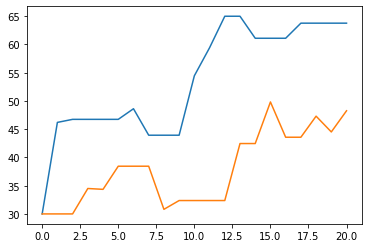

In [9]:
plt.plot(V)
plt.show()